In [188]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import allel


# https://github.com/ShujiaHuang/qmplot
from qmplot import qqplot
from qmplot import manhattanplot


In [3]:
#PCA 
pca_input = pd.read_csv('/Users/cmdb/qbb2021-answers/qbio_week3/plink.eigenvec', sep = " ",header = None
                       )

In [4]:
pca_input = pca_input.set_index(0)

In [5]:
#allele frequency
AF_df = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week3/plink.frq", delimiter=r"\s+")

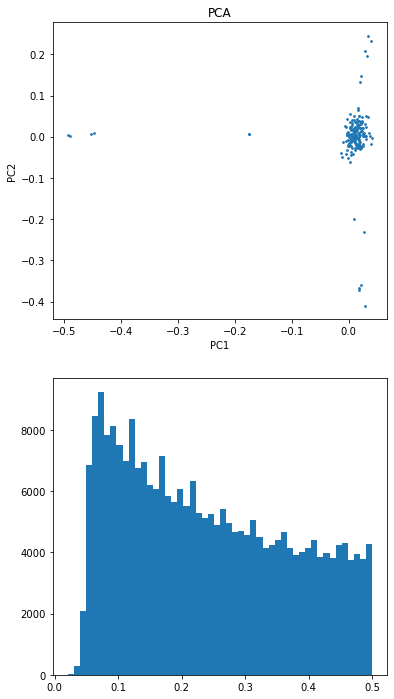

In [6]:
#plot to show the genetic relatedness using PCA and allele frequency distribution 
fig, axes = plt.subplots(2,1, figsize = (6,12))

axes[0].scatter(pca_input.iloc[:, 1], pca_input.iloc[:, 2], s = 3)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_title("PCA")

axes[1].hist(AF_df['MAF'], bins = 50)


plt.show()

### Produce qq-plot and manhattan plot for CB1908 

In [151]:
#import the data
cb_p = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week3/CB1908.assoc.linear", delimiter=r"\s+")

In [177]:
#Deliniate covariate data points
roi = cb_p['TEST']=='ADD'
cb1908 = cb_p.loc[roi]


In [361]:
qqplot(data = cb1908["P"], title = "QQ plot CB1908", figname="QQ_plot_CB1908.png")
manhattanplot(data = cb1908,
              chrom = "CHR",
              pos = 'BP', 
              snp="SNP",
              xlabel="Chromosome",
              suggestiveline=1e-5, 
              genomewideline=None,
              title = "Manhattan plot for CB1908",
              dpi = 300,
              ld_block_size=50000, 
              figname="manhattan_plot_CB1908.png")

<AxesSubplot:>

### Produce qq-plot and manhattan plot for GS451

In [182]:
#import the data
gs_p = pd.read_csv("/Users/cmdb/qbb2021-answers/qbio_week3/GS451.assoc.linear", delimiter=r"\s+")

In [185]:
#Deliniate covariate data points
roi2 = gs_p['TEST']=='ADD'
gs451= gs_p.loc[roi2]


In [360]:
qqplot(data = gs451["P"], title = "QQ plot GS451", figname="QQ_plot_GS451.png")
manhattanplot(data = gs451,
              chrom = "CHR",
              pos = 'BP', 
              snp="SNP",
              xlabel="Chromosome",
              suggestiveline=1e-5, 
              genomewideline=None,
              title = "Manhattan plot for GS451",
              dpi = 300,
              ld_block_size=50000, 
              figname="manhattan_plot_GS451.png")

/Users/cmdb/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:>

### Visualize the effect size of CB1908 by creating a boxplot of the phenotype stratified by genotype

In [187]:
cb1908.sort_values(by=['P'])

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
2028444,12,rs10876043,49190411,G,ADD,161,2.002000,7.422000,8.199000e-12
1239579,7,rs2158721,10615471,C,ADD,172,-1.388000,-5.555000,1.136000e-07
1134254,6,rs1848390,87167533,C,ADD,163,-1.514000,-5.536000,1.338000e-07
1244672,7,rs2262871,13482970,G,ADD,172,1.457000,5.483000,1.598000e-07
2623731,18,rs1942161,66965592,G,ADD,165,-1.301000,-5.375000,2.803000e-07
...,...,...,...,...,...,...,...,...,...
1128391,6,rs9443854,81750129,T,ADD,84,-0.000056,-0.000063,1.000000e+00
1224553,6,rs7741791,168132173,A,ADD,165,-0.000013,-0.000050,1.000000e+00
418352,2,rs980065,188798710,C,ADD,165,-0.000016,-0.000055,1.000000e+00
269071,2,rs4670688,37394564,G,ADD,165,0.000015,0.000046,1.000000e+00


In [194]:
#Genotype input
import io
import os

def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)), sep='\t')

In [195]:
gene = read_vcf("/Users/cmdb/qbb2021-answers/qbio_week3/genotypes.vcf")

In [200]:
gene

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,1001_1001,...,1167_1167,1168_1168,1169_1169,1170_1170,1171_1171,1172_1172,1173_1173,1174_1174,1175_1175,1176_1176
0,1,558185,rs9699599,A,G,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1,1,740098,rs12138618,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
2,1,744045,rs3131969,A,G,.,.,PR,GT,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/0
3,1,767376,rs6672353,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
4,1,851671,rs13302982,A,G,.,.,PR,GT,0/1,...,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256891,22,49411684,rs762672,C,T,.,.,PR,GT,0/1,...,0/1,0/1,0/1,0/0,0/1,0/0,0/1,0/1,0/0,0/1
256892,22,49417023,rs131711,G,C,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
256893,22,49486501,rs2341011,T,C,.,.,PR,GT,1/1,...,0/1,1/1,0/1,1/1,0/1,0/0,1/1,1/1,0/1,0/1
256894,22,49503532,rs9628187,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/1


In [286]:
#snp of interest is the role that correponds to rs10876043
soi_df = gene[gene["ID"] == "rs10876043"] #REF = A; ALT = G

#store the genotype of each individuals as a list
geno_list = soi_df.iloc[:, 9:].values.tolist()
#store the individuals as a list
indi_list_duplicate = soi_df.iloc[:, 9:].columns.values.tolist()
indi_listlist = [list(set(i.split("_"))) for i in indi_list]
indi_list_clean = [int(ind) for lis in indi_listlist for ind in lis]

#build a dictionary to store individual:genotpe
geno_dict = dict(zip(indi_list_clean,geno_list[0]))

In [287]:
geno_dict

{1001: '0/1',
 1002: '0/1',
 1003: './.',
 1004: '0/1',
 1005: '0/1',
 1006: '0/1',
 1007: '1/1',
 1008: '1/1',
 1009: '0/1',
 1010: '0/1',
 1011: '1/1',
 1012: '0/1',
 1013: '0/1',
 1014: '0/1',
 1015: '0/1',
 1016: './.',
 1017: './.',
 1018: './.',
 1019: '0/1',
 1020: '0/1',
 1021: '0/1',
 1022: '0/1',
 1023: '0/1',
 1024: '0/1',
 1025: '0/1',
 1026: './.',
 1027: '0/1',
 1028: '0/1',
 1029: '0/1',
 1030: '0/1',
 1031: '1/1',
 1032: '1/1',
 1033: '0/1',
 1034: '0/1',
 1035: './.',
 1036: '0/1',
 1037: '0/1',
 1038: '0/1',
 1039: '0/1',
 1040: '0/1',
 1041: '0/1',
 1042: '0/1',
 1043: '0/1',
 1044: '0/1',
 1045: '0/1',
 1046: '0/1',
 1047: '0/1',
 1048: '0/1',
 1049: './.',
 1050: '0/1',
 1051: '0/1',
 1052: '0/1',
 1053: '0/1',
 1054: '0/1',
 1055: '0/1',
 1056: '0/1',
 1057: '0/1',
 1058: '0/1',
 1059: '0/1',
 1060: '0/1',
 1061: '0/1',
 1062: '0/1',
 1063: '0/1',
 1064: '0/1',
 1065: '0/1',
 1066: '0/1',
 1067: '0/1',
 1068: '0/1',
 1069: '0/1',
 1070: '1/1',
 1071: '0/1',
 1072:

In [333]:
##Build a phenotype profile
pheno = pd.read_table("/Users/cmdb/qbb2021-answers/qbio_week3/CB1908_IC50.txt", sep='\s+')


In [345]:
pheno_nona = pheno.dropna()

In [346]:

ID = pheno_nona['FID'].dropna().tolist()
phenotype = pheno_nona['CB1908_IC50'].dropna().tolist()

In [348]:
pheno_dict = dict(zip(ID, phenotype))

In [349]:
pheno_dict

{1001: 6.927465594,
 1002: 11.88728968,
 1003: 12.18924303,
 1004: 11.95346787,
 1005: 8.836499122000001,
 1006: 8.153960117999999,
 1007: 10.23771873,
 1008: 9.354080993,
 1009: 9.596693723,
 1010: 6.272276985,
 1011: 9.962993694,
 1012: 6.355427097000001,
 1013: 6.191365417999999,
 1014: 8.115864905,
 1015: 7.637110777999999,
 1016: 6.799138511000001,
 1017: 8.344191918,
 1018: 3.3454584360000004,
 1019: 7.97508359,
 1021: 7.032349489,
 1022: 5.751398414,
 1023: 6.739431599999999,
 1024: 5.790128517,
 1025: 7.134384401,
 1026: 6.879968695,
 1027: 5.442729589,
 1028: 6.442158785,
 1029: 6.21293642,
 1030: 12.59583597,
 1031: 10.96563817,
 1032: 7.118429984,
 1033: 5.9323505889999995,
 1034: 10.92404283,
 1035: 8.618631976,
 1036: 10.91598423,
 1037: 6.160189195,
 1038: 9.146633095,
 1039: 10.32013623,
 1040: 9.252982231,
 1041: 7.325145319,
 1043: 8.765233418,
 1044: 10.32392128,
 1045: 9.40357222,
 1046: 7.778176975,
 1047: 11.07849929,
 1048: 5.6048783879999995,
 1049: 10.97003384,


In [350]:
#Stratify genotypes according to phenotypes - get the keys first
#WT - A/A (0/0)
WT_keys = [keys for keys, val in geno_dict.items() if val == "0/0"]

#A/G (0/1)
AG_keys = [keys for keys, val in geno_dict.items() if val == "0/1"]

#G/G (1/1)
GG_keys = [keys for keys, val in geno_dict.items() if val == "1/1"]


In [354]:
# Get the phenotype expression
#WT
WT_pheno = [pheno_dict[key] for key in WT_keys if key in ID]

#A/G
AG_pheno = [pheno_dict[key] for key in AG_keys if key in ID]

#G/G
GG_pheno = [pheno_dict[key] for key in GG_keys if key in ID]


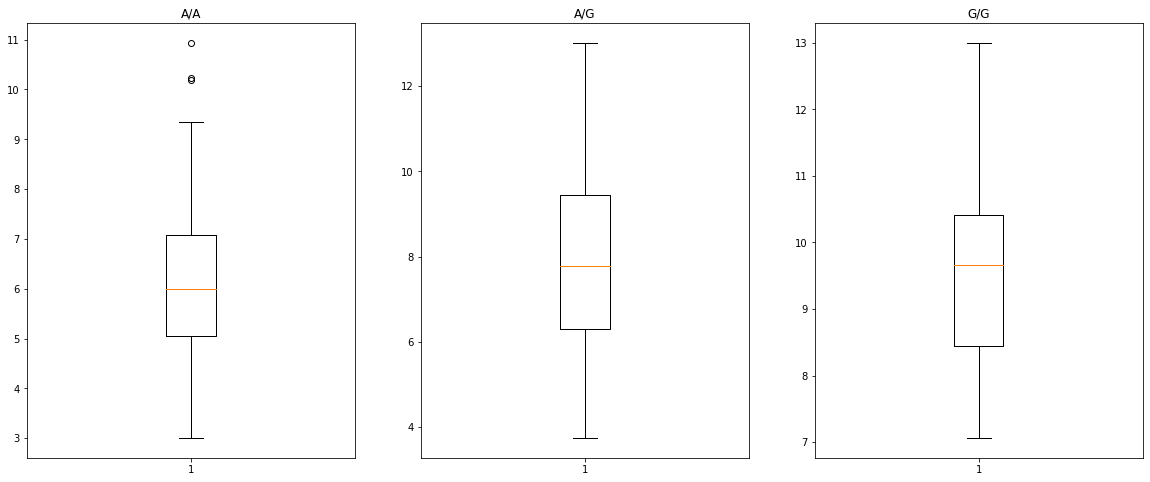

In [359]:
#plot the box plots
fig, axes = plt.subplots(1,3, figsize = (20,8))
axes[0].boxplot(WT_pheno)
axes[0].set_title("A/A")

axes[1].boxplot(AG_pheno)
axes[1].set_title("A/G")

axes[2].boxplot(GG_pheno)
axes[2].set_title("G/G")

plt.savefig('Boxplot')
plt.show()
